## Final Report 
### Imports

In [1]:
# Imports

# Display plots directly in the notebook instead of in a new window
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
import statsmodels.api as sm
import os 

import warnings
warnings.filterwarnings('ignore')

### Reading in the UC School csv files

In [2]:
# Read in Berekeley
df_ucb = pd.read_csv(os.path.join('Datasets', 'UC_Berkeley.csv'), 
                     dtype={'date': 'str', 'word_count':int, 'school':'str'})

# Read in Davis
df_ucd = pd.read_csv(os.path.join('Datasets', 'UC_Davis.csv'), 
                     dtype={'date': 'str', 'word_count':int, 'text':'str', 'school':'str'})

# Read in Irvine
#df_uci = pd.read_csv(os.path.join('Datasets', 'UC_Irvine.csv'), 
#                     dtype={'date': 'str', 'word_count':int, 'school':'str'})

# Read in Los Angeles
df_ucla = pd.read_csv(os.path.join('Datasets', 'UC_Los_Angeles.csv'), 
                      dtype={'date': 'str', 'word_count':int, 'school':'str'})

# Read in Merced
df_ucm = pd.read_csv(os.path.join('Datasets', 'UC_Merced.csv'), 
                     dtype={'date': 'str', 'word_count':int, 'content':'str', 'school':'str'})

# Read in Riverside
#df_ucr = pd.read_csv(os.path.join('Datasets', 'UC_Riverside.csv'), 
#                     dtype={'date': 'str', 'word_count':'str', 'school':'str'})

# Read in San Diego
df_ucsd = pd.read_csv(os.path.join('Datasets', 'UC_San_Diego.csv'), 
                      dtype={'date': 'str', 'word_count':'str', 'school':'str'})

# Read in Santa Barbra
df_ucsb = pd.read_csv(os.path.join('Datasets', 'UC_Santa_Barbara.csv'),
                      dtype={'date': 'str', 'word_count':int, 'school':'str'})

# Read in Santa Cruz
df_ucsc = pd.read_csv(os.path.join('Datasets', 'UC_Santa_Cruz.csv'), 
                      dtype={'date': 'str', 'word_count':int, 'content':'str', 'school':'str'})


### Take a look at UC Berkeley 

In [3]:
# Adding a 'state' column and setting its default value to 'CA'
df_ucb['state'] = 'CA'

# Dropping the 'link' column associated with each update
df_ucb = df_ucb.drop(['link'], axis =1)

# Reordering the columns into a more readable format
df_ucb = df_ucb[['date','school','state','content','word_count']]


df_ucb.head()

,date,school,state,content,word_count
0,18-May-20,Berkeley,CA,We are writing today to share news about budge...,397
1,16-May-20,Berkeley,CA,Members of the remarkable and resilient gradua...,1368
2,14-May-20,Berkeley,CA,A simulated Commencement 2020 will take place ...,2291
3,12-May-20,Berkeley,CA,"Last Tuesday, our campus participated in #Givi...",887
4,12-May-20,Berkeley,CA,There are two major budget concerns Chancellor...,354


### Take a look at UC Davis 

In [4]:
# Renaming text column to content
df_ucd = df_ucd.rename(columns = {'text':'content'})

# Adding a 'state' column and setting its default value to 'CA'
df_ucd['state'] = 'CA'

# Reordering the columns into a more readable format
df_ucd = df_ucd[['date','school','state','content']]

df_ucd.head()

,date,school,state,content
0,31-Jan-20,Davis,CA,Fight it like the flu\nUpdated 5 p.m. Jan. 31 ...
1,1-Feb-20,Davis,CA,"Yolo County info page\nYolo County, in which t..."
2,3-Feb-20,Davis,CA,Screening at airports\nUpdated 9 p.m. Feb. 3 ...
3,7-Feb-20,Davis,CA,No reports of coronavirus\nUpdated 11:30 a.m. ...
4,10-Feb-20,Davis,CA,UC Davis Live\nUpdated Feb. 10 Watch UC Davis ...


### Take a look at UC Irvine 

In [5]:
# Take a look at Irvine
#df_uci['state'] = 'CA'
#df_uci.head()

### Take a look at UC Los Angeles 

In [6]:
# Adding a 'state' column and setting its default value to 'CA'
df_ucla['state'] = 'CA'

# Reordering the columns into a more readable format
df_ucla = df_ucla[['date','school','state','word_count']]

df_ucla.head()

,date,school,state,word_count
0,23-Jan-20,Los Angeles,CA,318
1,31-Jan-20,Los Angeles,CA,434
2,4-Feb-20,Los Angeles,CA,402
3,20-Feb-20,Los Angeles,CA,370
4,27-Feb-20,Los Angeles,CA,220


### Take a look at UC Merced 

In [7]:
# Adding a 'state' column and setting its default value to 'CA'
df_ucm['state'] = 'CA'

# Reordering the columns into a more readable format
df_ucm = df_ucm[['date','school','state','content', 'word_count']]

df_ucm.head()

,date,school,state,content,word_count
0,4-Feb-20,Merced,CA,"Coronavirus Update\nFebruary 4, 2020\nInformat...",190
1,28-Feb-20,Merced,CA,UPDATE: What You Need to Know About COVID-19\n...,457
2,6-Mar-20,Merced,CA,COVID-19: Protect Yourself and Each Other\nMar...,468
3,8-Mar-20,Merced,CA,"COVID-19: University Travel Guidance\nMarch 8,...",411
4,9-Mar-20,Merced,CA,"COVID-19 Instructional Continuity\nMarch 9, 20...",489


### Take a look at UC Riverside 

In [8]:
# Adding a 'state' column and setting its default value to 'CA'
#df_ucr['state'] = 'CA'
#df_ucr.head()

### Take a look at UC San Diego 

In [9]:
# Adding a 'state' column and setting its default value to 'CA'
df_ucsd['state'] = 'CA'

# Reordering the columns into a more readable format
df_ucsd = df_ucsd[['date','school','state','word_count']]

# Printing dataframe so we can view all entries
print(df_ucsd.to_string()) # You will notice NaNs at the bottom of the data frame

         date school state word_count
0   22-Jan-20  Diego    CA        285
1   23-Jan-20  Diego    CA        507
2   27-Jan-20  Diego    CA        807
3   30-Jan-20  Diego    CA        280
4   30-Jan-20  Diego    CA        873
5   31-Jan-20  Diego    CA       1393
6    3-Feb-20  Diego    CA        799
7    5-Feb-20  Diego    CA       1485
8   14-Feb-20  Diego    CA        355
9   26-Feb-20  Diego    CA        410
10  26-Feb-20  Diego    CA        490
11  28-Feb-20  Diego    CA        694
12   4-Mar-20  Diego    CA        612
13   5-Mar-20  Diego    CA        566
14   8-Mar-20  Diego    CA        572
15   9-Mar-20  Diego    CA         59
16   9-Mar-20  Diego    CA        902
17  11-Mar-20  Diego    CA        264
18  12-Mar-20  Diego    CA        335
19  13-Mar-20  Diego    CA       1379
20  13-Mar-20  Diego    CA        348
21  13-Mar-20  Diego    CA        592
22  16-Mar-20  Diego    CA        252
23  16-Mar-20  Diego    CA        482
24  16-Mar-20  Diego    CA        843
25  17-Mar-2

In [10]:
# Dropping the empty rows at the bottom of df_ucsd
df_ucsd = df_ucsd.dropna()

# Now that the 4 rows with missing data on the bottom with the NaN values have been removed 
# We can convert word_count column back into an integer
convert_dict = {'word_count': int}
df_ucsd = df_ucsd.astype(convert_dict)

df_ucsd.head()

,date,school,state,word_count
0,22-Jan-20,Diego,CA,285
1,23-Jan-20,Diego,CA,507
2,27-Jan-20,Diego,CA,807
3,30-Jan-20,Diego,CA,280
4,30-Jan-20,Diego,CA,873


### Take a look at UC Santa Barbara 

In [11]:
# Adding a 'state' column and setting its default value to 'CA'
df_ucsb['state'] = 'CA'
df_ucsb = df_ucsb.drop(['link'], axis =1)

# Reordering the columns into a more readable format
df_ucsb = df_ucsb[['date','school','state','content', 'word_count']]

df_ucsb.head()

,date,school,state,content,word_count
0,14-May-20,Santa Barbara,CA,"Dear Members of Our Campus Community,\r\n\r\nI...",1546
1,18-Apr-20,Santa Barbara,CA,"Dear Members of Our Campus Community,\r\n\r\nW...",498
2,13-Apr-20,Santa Barbara,CA,"Dear Members of Our Campus Community,\r\n\r\nW...",395
3,07-Apr-20,Santa Barbara,CA,"Dear Members of Our Campus Community,\r\n\r\nI...",484
4,02-Apr-20,Santa Barbara,CA,"Dear Members of Our Campus Community,\r\n\r\nI...",74


### Take a look at Santa Cruz

In [12]:
# Adding a 'state' column and setting its default value to 'CA'
df_ucsc['state'] = 'CA'

# Reordering the columns into a more readable format
df_ucsc = df_ucsc[['date','school','state','content', 'word_count']]

df_ucsc.head()

,date,school,state,content,word_count
0,24-Jan-20,Santa Cruz,CA,The UC Santa Cruz Student Health Center offers...,414
1,30-Jan-20,Santa Cruz,CA,UC Santa Cruz health officials are closely mon...,382
2,31-Jan-20,Santa Cruz,CA,Due to the dynamic situation with the coronavi...,338
3,4-Feb-20,Santa Cruz,CA,The UC Office of the President has directed th...,1276
4,4-Feb-20,Santa Cruz,CA,To: UC Santa Cruz Community\nFrom: Public Affa...,989


### Combining all of our UC data frames

In [13]:
# concatenating the dataframes together
df_ca = pd.concat([df_ucsc, df_ucm, df_ucd, df_ucb, df_ucsd, df_ucsb, df_ucla], sort= True)

# ordering columns
df_ca = df_ca[['date','school','state','content', 'word_count']]

# replacing any incidents of '\r' and '\n' 
df_ca = df_ca.replace(r'\n',' ', regex=True) 
df_ca = df_ca.replace(r'\r',' ', regex=True) 

df_ca.content = df_ca.content.astype('str')

# looking at the entire dataframe
print(df_ca.to_string())

           date         school state                                            content  word_count
0     24-Jan-20     Santa Cruz    CA  The UC Santa Cruz Student Health Center offers...       414.0
1     30-Jan-20     Santa Cruz    CA  UC Santa Cruz health officials are closely mon...       382.0
2     31-Jan-20     Santa Cruz    CA  Due to the dynamic situation with the coronavi...       338.0
3      4-Feb-20     Santa Cruz    CA  The UC Office of the President has directed th...      1276.0
4      4-Feb-20     Santa Cruz    CA  To: UC Santa Cruz Community From: Public Affai...       989.0
5      5-Feb-20     Santa Cruz    CA  UCSF is hosting a town hall today on the novel...       273.0
6      7-Feb-20     Santa Cruz    CA  The UC Santa Cruz Student Health Center shared...       700.0
7      7-Feb-20     Santa Cruz    CA  Students: How to get a flu vaccine February 07...       359.0
8     10-Feb-20     Santa Cruz    CA  Campus community members can learn more about ...       178.0


### Reading in Texas school csv files

In [14]:
# Read in Texas State University (UNICODEDECODE ERRROR)
df_tsu = pd.read_csv(os.path.join('Datasets', 'Texas_State_University.csv'), 
                     dtype={'date': 'str', 'word_count':int, 'school':'str'})

# Read in University Austin Texas
df_uat = pd.read_csv(os.path.join('Datasets', 'University_Austin_Texas.csv'), 
                     dtype={'date': 'str', 'word_count':int, 'school':'str'})

# Read in Texas A&M University
df_utm = pd.read_csv(os.path.join('Datasets', 'U_T&M.csv'), 
                     dtype={'date': 'str', 'word_count':int, 'school':'str'})


# Read in University North Texas
df_unt = pd.read_csv(os.path.join('Datasets', 'UNT.csv'), 
                     dtype={'date': 'str', 'word_count':int, 'school':'str'})

# Reading in University of Houston
df_uh = pd.read_csv(os.path.join('Datasets', 'University_Houston.csv'), 
                     dtype={'date': 'str', 'word_count':int, 'school':'str'})



## Take a look at Texas State University

In [15]:
# Renaming message column to content
df_tsu = df_tsu.rename(columns = {'message':'content'})

# Adding a 'state' column and setting its default value to 'TX'
df_tsu['state'] = 'TX'

# Reordering the columns into a more readable format
df_tsu = df_tsu[['date','school','state','content']]

df_tsu.head()

,date,school,state,content
0,30-Jan-20,Texas State University,TX,In response to the Novel Coronavirus outbreak...
1,26-Feb-20,Texas State University,TX,"Over the past several weeks, Texas State Univ..."
2,28-Feb-20,Texas State University,TX,"Over the past several weeks, Texas State Univ..."
3,2-Mar-20,Texas State University,TX,"Dear Texas State Community,\n\nAs news continu..."
4,5-Mar-20,Texas State University,TX,The City of San Marcos in coordination with H...


## Take a look at University of Austin Texas

In [16]:
# Renaming text column to content
df_uat = df_uat.rename(columns = {'text':'content'})

# Adding a 'state' column and setting its default value to 'TX'
df_uat['state'] = 'TX'

# Reordering the columns into a more readable format
df_uat = df_uat[['date','school','state','content']]

df_uat.head()

,date,school,state,content
0,12-May-20,Austin,TX,"Admissions has suspended campus visits, Admiss..."
1,13-May-20,Austin,TX,COVID-19 Identified within UT Community - from...
2,15-May-20,Austin,TX,"Through March 30, students are on spring break..."
3,16-May-20,Austin,TX,"Starting March 16, 2020, all campus buildings ..."
4,17-May-20,Austin,TX,"Starting March 16, 2020, all campus buildings ..."


## Take a look at Texas A&M University

In [17]:
# Renaming text column to content
df_utm = df_utm.rename(columns = {'text':'content'})

# Adding a 'state' column and setting its default value to 'TX'
df_utm['state'] = 'TX'

# Reordering the columns into a more readable format
df_utm = df_utm[['date','school','state','content']]

df_utm.head()

,date,school,state,content
0,28-Feb-20,T_A&M_U,TX,"February 28, 2020, 5:45 p.m. CST Dear Texas A&..."
1,2-Mar-20,T_A&M_U,TX,"March 2, 2020, 7:55 p.m. CST Texas A&M Univers..."
2,3-Mar-20,T_A&M_U,TX,"March 3, 2020, 5:45 p.m. CST Texas A&M continu..."
3,6-Mar-20,T_A&M_U,TX,"March 6, 2020, 4:30 p.m. CST Students, faculty..."
4,9-Mar-20,T_A&M_U,TX,"March 9, 2020, 5:00 p.m. CDT Texas A&M Cancels..."


## Take a look at University of North Texas

In [18]:
# Adding a 'state' column and setting its default value to 'TX'
df_unt['state'] = 'TX'

# Dropping the 'link' column associated with each update
df_unt = df_unt.drop(['link'], axis =1) 

# Reordering the columns into a more readable format
df_unt = df_unt[['date','school','state','content']]

df_unt.head()

,date,school,state,content
0,18-May-2020,University of North Texas,TX,"Dear UNT community,\r\n\r\nDenton County Publi..."
1,15-May-2020,University of North Texas,TX,Final COVID-19 Regular Update\r\n\r\nToday’s e...
2,13-May-2020,University of North Texas,TX,In an effort to keep our community as healthy ...
3,11-May-2020,University of North Texas,TX,Have you been wearing a cloth face cover? Acco...
4,11-May-2020,University of North Texas,TX,"Dear UNT undergraduate students,\r\n\r\nWe hop..."


## Take a look at University of Houston

In [19]:
# Adding a 'state' column and setting its default value to 'TX'
df_uh['state'] = 'TX'

# Dropping the empty rows at the bottom of df_uh
df_uh = df_uh.dropna()

# Renamine the columns to match other Texas data frames
df_uh.columns = ['date', 'content', 'school', 'state']

# Reordering the columns into a more readable format
df_uh = df_uh[['date','school','state','content']]

df_uh.head()

,date,school,state,content
0,27-Jan,Houston,TX,"Dear Faculty, Students and Staff,\n\nThe Unive..."
1,28-Jan,Houston,TX,"Dear Faculty, Students and Staff,\n\nAt this t..."
2,2-Mar,Houston,TX,"Dear Students, Faculty and Staff,\n\nThe Unive..."
3,4-Mar,Houston,TX,"UHS Faculty, Staff and Students,\n\nWe continu..."
4,6-Mar,Houston,TX,Dear Faculty:\n\nThere are now five confirmed ...


## Combining all of our Texas dataframes

In [20]:
# concatenating the dataframes together
df_tx = pd.concat([df_tsu, df_uat, df_utm, df_unt, df_uh], sort= True)
df_tx = df_tx[['date','school','state','content']]

# replacing any incidents of '\r' and '\n' 
df_tx = df_tx.replace(r'\n',' ', regex=True) 
df_tx = df_tx.replace(r'\r',' ', regex=True) 

# looking at the entire dataframe
print(df_tx.to_string())

           date                     school state                                            content
0     30-Jan-20     Texas State University    TX   In response to the Novel Coronavirus outbreak...
1     26-Feb-20     Texas State University    TX   Over the past several weeks, Texas State Univ...
2     28-Feb-20     Texas State University    TX   Over the past several weeks, Texas State Univ...
3      2-Mar-20     Texas State University    TX  Dear Texas State Community,  As news continues...
4      5-Mar-20     Texas State University    TX   The City of San Marcos in coordination with H...
5      6-Mar-20     Texas State University    TX   Dear University Community,   As new cases of ...
6      9-Mar-20     Texas State University    TX  Dear Texas State Community,   In response to t...
7     12-Mar-20     Texas State University    TX  Dear Students, Faculty, and Staff,  I  have an...
8     16-Mar-20     Texas State University    TX  Pandemic and Post-Pandemic Work Groups May 18,...


## Reading in Florida csv files

In [21]:
# Reading in Florida State University (UNICODE ERROR)
#df_fsu = pd.read_csv(os.path.join('Datasets', 'Florida_State_Univeristy.csv'), 
#                     dtype={'date': 'str', 'word_count':int, 'school':'str'})

# Reading in University of Central Florida
df_ucf = pd.read_csv(os.path.join('Datasets', 'UCF.csv'), 
                     dtype={'date': 'str', 'word_count':int, 'school':'str'})

# Reading in Universirty of Florida
df_uf = pd.read_csv(os.path.join('Datasets', 'University_Florida.csv'), 
                     dtype={'date': 'str', 'word_count':int, 'school':'str'})

# Reading in University South Florida
df_usf = pd.read_csv(os.path.join('Datasets', 'USoFlorida.csv'), 
                     dtype={'date': 'str', 'word_count':int, 'school':'str'})

# Reading in University of Miami
df_um = pd.read_csv(os.path.join('Datasets', 'University_Miami.csv'), 
                     dtype={'date': 'str', 'word_count':int, 'school':'str'})

## Take a look at Florida State University

In [22]:
#df_fsu

## Take a look at University of Central Florida

In [23]:
# Adding a 'state' column and setting its default value to 'TX'
df_ucf['state'] = 'FL'

# Dropping the 'link' column associated with each update
df_ucf = df_ucf.drop(['link'], axis =1) 

# Reordering the columns into a more readable format
df_ucf = df_ucf[['date','school','state','content']]

df_ucf.head()

,date,school,state,content
0,21-May-2020,University of Central Florida,FL,As we are all adjusting to the different reali...
1,20-May-2020,University of Central Florida,FL,COVID-19 has impacted all of us in some way. T...
2,13-May-2020,University of Central Florida,FL,As businesses and other entities across the st...
3,13-May-2020,University of Central Florida,FL,We would like to thank you for your continued ...
4,11-May-2020,University of Central Florida,FL,To continue to support our Knights during this...


## Take a look at University of Florida

In [24]:
# Renaming text column to content
df_uf = df_uf.rename(columns = {'text':'content'})

# Adding a 'state' column and setting its default value to 'TX'
df_uf['state'] = 'FL'

# Reordering the columns into a more readable format
df_uf = df_uf[['date','school','state','content']]

df_uf.head()

,date,school,state,content
0,24-Jan-20,Florida,FL,JANUARY 24: GUIDANCE ON COVID-19\r\nUniversity...
1,31-Jan-20,Florida,FL,JANUARY 31: GUIDANCE ON COVID-19\r\nWith the W...
2,10-Feb-20,Florida,FL,FEBRUARY 10: GUIDANCE ON COVID-19\r\nAs the ou...
3,11-Feb-20,Florida,FL,FEBRUARY 11: GUIDANCE ON COVID-19\r\nTravelers...
4,28-Feb-20,Florida,FL,FEBRUARY 28: GUIDANCE ON COVID-19\r\nAs cases ...


## Take a look at University of South Florida

In [25]:
# Renaming text column to content
df_usf = df_usf.rename(columns = {'text':'content'})

# Adding a 'state' column and setting its default value to 'TX'
df_usf['state'] = 'FL'

# Reordering the columns into a more readable format
df_usf = df_usf[['date','school','state','content', 'word_count']]

df_usf.head()

,date,school,state,content,word_count
0,27-Jan-20,USF,FL,"JANUARY 27, 2020COMMUNITY Dear USF students, f...",503
1,31-Jan-20,USF,FL,"JANUARY 31, 2020COMMUNITY Dear USF community, ...",471
2,28-Feb-20,USF,FL,"FEBRUARY 28, 2020COMMUNITY Dear USF community,...",901
3,2-Mar-20,USF,FL,"Dear USF community, The University of South Fl...",544
4,11-Mar-20,USF,FL,"MARCH 11, 2020COMMUNITY, FACULTY, STAFF, STUDE...",787


## Take a look at University of Miami

In [26]:
# Adding a 'state' column and setting its default value to 'TX'
df_um['state'] = 'FL'

# Dropping the empty rows at the bottom of df_um
df_um = df_um.dropna()

# Renamine the columns to match other Texas data frames
df_um.columns = ['date', 'content', 'school', 'state']

# Reordering the columns into a more readable format
df_um = df_um[['date','school','state','content']]

df_um.head()

,date,school,state,content
0,27-Jan-20,Miami,FL,Health Advisory: Novel Coronavirus (2019-nCoV)...
1,31-Jan-20,Miami,FL,"To the University of Miami Community,\n\nWe ar..."
2,26-Feb-20,Miami,FL,"To the University of Miami Community,\n\nFollo..."
3,28-Feb-20,Miami,FL,"To the University of Miami Community,\n\nThe U..."
4,05-Mar-20,Miami,FL,Dear Faculty:\n\nAs we prepare for spring brea...


## Combining all of our Florida  dataframes

In [27]:
# concatenating the dataframes together
df_fl = pd.concat([df_ucf, df_uf,df_usf, df_um], sort= True)
df_fl = df_fl[['date','school','state','content', 'word_count']]

# replacing any incidents of '\r' and '\n' 
df_fl = df_fl.replace(r'\n',' ', regex=True) 
df_fl = df_fl.replace(r'\r',' ', regex=True) 
# looking at the entire dataframe
print(df_tx.to_string())

           date                     school state                                            content
0     30-Jan-20     Texas State University    TX   In response to the Novel Coronavirus outbreak...
1     26-Feb-20     Texas State University    TX   Over the past several weeks, Texas State Univ...
2     28-Feb-20     Texas State University    TX   Over the past several weeks, Texas State Univ...
3      2-Mar-20     Texas State University    TX  Dear Texas State Community,  As news continues...
4      5-Mar-20     Texas State University    TX   The City of San Marcos in coordination with H...
5      6-Mar-20     Texas State University    TX   Dear University Community,   As new cases of ...
6      9-Mar-20     Texas State University    TX  Dear Texas State Community,   In response to t...
7     12-Mar-20     Texas State University    TX  Dear Students, Faculty, and Staff,  I  have an...
8     16-Mar-20     Texas State University    TX  Pandemic and Post-Pandemic Work Groups May 18,...


# Sentiment Analysis

In [28]:
#import natural language toolkit
import nltk

# get lexicon we'll be working with today
nltk.download('vader_lexicon') 

## import word tokenizer
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dillon\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Let's start with the UC schools

#### Tokenization

In [36]:
# To fix the lookup error produced by this cell
nltk.download('punkt')

# Provided code from lecture
df_ca['token'] = df_ca['content'].apply(word_tokenize) 

df_ca.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dillon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,date,school,state,content,word_count,token,stop
0,24-Jan-20,Santa Cruz,CA,The UC Santa Cruz Student Health Center offers...,414.0,"[The, UC, Santa, Cruz, Student, Health, Center...","[The, UC, Santa, Cruz, Student, Health, Center..."
1,30-Jan-20,Santa Cruz,CA,UC Santa Cruz health officials are closely mon...,382.0,"[UC, Santa, Cruz, health, officials, are, clos...","[UC, Santa, Cruz, health, officials, closely, ..."
2,31-Jan-20,Santa Cruz,CA,Due to the dynamic situation with the coronavi...,338.0,"[Due, to, the, dynamic, situation, with, the, ...","[Due, dynamic, situation, coronavirus, protect..."
3,4-Feb-20,Santa Cruz,CA,The UC Office of the President has directed th...,1276.0,"[The, UC, Office, of, the, President, has, dir...","[The, UC, Office, President, directed, faculty..."
4,4-Feb-20,Santa Cruz,CA,To: UC Santa Cruz Community From: Public Affai...,989.0,"[To, :, UC, Santa, Cruz, Community, From, :, P...","[To, :, UC, Santa, Cruz, Community, From, :, P..."


#### Stop words

In [30]:
# To fix the lookup error produced by this cell
nltk.download('stopwords')

# import stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# look at stop words
print(stop_words)

{'each', 'mightn', 'doing', 'once', 'm', 'when', 'you', 'didn', 'a', 'again', "isn't", 'where', 'before', 'they', "shan't", 'why', 'through', 'couldn', 'myself', 'll', 'am', "couldn't", 'being', 'with', 'my', 'whom', 'her', 'of', "didn't", 'an', 'herself', 'who', 'after', 'will', 'theirs', 'its', "don't", "aren't", 't', 'ma', 'off', "that'll", 'out', 'o', 'same', 'then', "she's", 'into', 'your', 'below', 'any', 'we', 'y', 'i', 'not', 'ourselves', 'can', 'itself', 'their', 'yours', "you're", 'further', 'isn', 'about', 'have', 'while', 'needn', "hadn't", 'has', 'had', 'there', 'other', 'so', 'now', 'does', 'by', 'against', 'here', 'because', 'both', 'are', 'hadn', 'over', 'most', 'ain', 'only', "wouldn't", "it's", 'this', 'such', 'those', 'his', 'from', 'or', "weren't", 'and', 'yourself', 'yourselves', 'few', "should've", 'too', "haven't", 'during', 'what', 'if', 'just', 'haven', 's', 'were', 'down', 'shan', 'do', 'he', 'all', 'did', "doesn't", 'having', 'd', 'how', "shouldn't", 'under',

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dillon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
# remove stop words
df_ca['stop'] = df_ca['token'].apply(lambda x: [item for item in x if item not in stop_words])
df_ca.head()

,date,school,state,content,word_count,token,stop
0,24-Jan-20,Santa Cruz,CA,The UC Santa Cruz Student Health Center offers...,414.0,"[The, UC, Santa, Cruz, Student, Health, Center...","[The, UC, Santa, Cruz, Student, Health, Center..."
1,30-Jan-20,Santa Cruz,CA,UC Santa Cruz health officials are closely mon...,382.0,"[UC, Santa, Cruz, health, officials, are, clos...","[UC, Santa, Cruz, health, officials, closely, ..."
2,31-Jan-20,Santa Cruz,CA,Due to the dynamic situation with the coronavi...,338.0,"[Due, to, the, dynamic, situation, with, the, ...","[Due, dynamic, situation, coronavirus, protect..."
3,4-Feb-20,Santa Cruz,CA,The UC Office of the President has directed th...,1276.0,"[The, UC, Office, of, the, President, has, dir...","[The, UC, Office, President, directed, faculty..."
4,4-Feb-20,Santa Cruz,CA,To: UC Santa Cruz Community From: Public Affai...,989.0,"[To, :, UC, Santa, Cruz, Community, From, :, P...","[To, :, UC, Santa, Cruz, Community, From, :, P..."


### Stemming
Stemming reduces words to their root words. For example, "washes", "washing", and "washed" all **stem**, or originate from the word "wash"

In [35]:
# Stemming
from nltk.stem import PorterStemmer

ps = PorterStemmer()

#stemmed_words=[]
#for w in filtered_sent:
#    stemmed_words.append(ps.stem(w))

#print("Filtered Sentence:", filtered_sent)
#print("Stemmed Sentence:", stemmed_words)

In [37]:
df_ca['stem'] = df_ca['stop'].apply(lambda x: [ps.stem(y) for y in x])
df_ca.head()

,date,school,state,content,word_count,token,stop,stem
0,24-Jan-20,Santa Cruz,CA,The UC Santa Cruz Student Health Center offers...,414.0,"[The, UC, Santa, Cruz, Student, Health, Center...","[The, UC, Santa, Cruz, Student, Health, Center...","[the, UC, santa, cruz, student, health, center..."
1,30-Jan-20,Santa Cruz,CA,UC Santa Cruz health officials are closely mon...,382.0,"[UC, Santa, Cruz, health, officials, are, clos...","[UC, Santa, Cruz, health, officials, closely, ...","[UC, santa, cruz, health, offici, close, monit..."
2,31-Jan-20,Santa Cruz,CA,Due to the dynamic situation with the coronavi...,338.0,"[Due, to, the, dynamic, situation, with, the, ...","[Due, dynamic, situation, coronavirus, protect...","[due, dynam, situat, coronaviru, protect, heal..."
3,4-Feb-20,Santa Cruz,CA,The UC Office of the President has directed th...,1276.0,"[The, UC, Office, of, the, President, has, dir...","[The, UC, Office, President, directed, faculty...","[the, UC, offic, presid, direct, faculti, ,, s..."
4,4-Feb-20,Santa Cruz,CA,To: UC Santa Cruz Community From: Public Affai...,989.0,"[To, :, UC, Santa, Cruz, Community, From, :, P...","[To, :, UC, Santa, Cruz, Community, From, :, P...","[To, :, UC, santa, cruz, commun, from, :, publ..."


### Frequency Distribution
Time to see which words occure most frequently

In [41]:
# get series of all words after stemming
stem_ca = df_ca['stem'].apply(pd.Series).stack()

In [42]:
from nltk.probability import FreqDist
import string

# calculation word frequency
fdist_stem_ca = FreqDist(stem_ca)


# remove punctuation counts
for punc in string.punctuation:
    del fdist_stem_ca[punc]


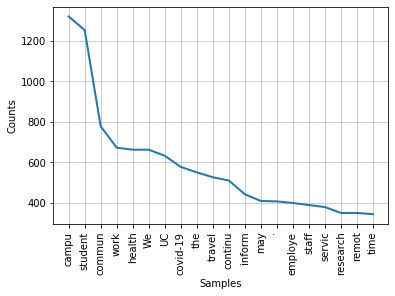

In [43]:
# Frequency Distribution Plot - top 20

# for words in what students like most
fdist_stem_ca.plot(20, cumulative=False)

In [44]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
analyser = SentimentIntensityAnalyzer()

In [45]:
# Some text taken from UC Santa Cruz's first COVID-19 update
analyser.polarity_scores(""""We know that many of you are concerned about the recent appearance of the coronavirus. 
                         Although there have been no confirmed cases on campus, we want to provide you with some 
                         information about how to protect your health.""")

{'neg': 0.054, 'neu': 0.852, 'pos': 0.095, 'compound': 0.1779}

**From lecture 6_04**

"pos + neg + neu = 1"

"compound score - metric that calculates sum of all the lexicon ratings and normalizes between -1(most extreme negative) and +1 (most extreme positive)

    positive: compound >= 0.05
    neutral: -0.05 < compound < 0.05
    negative : compound <= -0.05



Let's start calculating the **sentiment** of the content

In [48]:
# get list of the 'sentences' (responses) from each individual
ca_list = list(df_ca['content'].values)

In [49]:
# create function that will output dataframe 
# that stores sentiment information
def get_sentiments(input_list):
    
    output = pd.DataFrame()

    for sentence in input_list:
        ss = analyser.polarity_scores(sentence)
        ss['sentence'] = sentence
        output = output.append(ss, ignore_index=True)

    return output

In [50]:
# get sentiment measures
ca_sentiments = get_sentiments(ca_list)

In [51]:
ca_sentiments.head()

,compound,neg,neu,pos,sentence
0,-0.9219,0.114,0.800,0.086,The UC Santa Cruz Student Health Center offers...
1,-0.9725,0.108,0.843,0.049,UC Santa Cruz health officials are closely mon...
2,0.9246,0.031,0.898,0.071,Due to the dynamic situation with the coronavi...
3,0.9376,0.070,0.847,0.082,The UC Office of the President has directed th...
4,0.9702,0.030,0.856,0.114,To: UC Santa Cruz Community From: Public Affai...


In [52]:
ca_sentiments.describe()

,compound,neg,neu,pos
count,353.000000,353.000000,353.000000,353.000000
mean,0.503803,0.029020,0.898266,0.072654
std,0.564434,0.031424,0.077708,0.060968
min,-0.994500,0.000000,0.685000,0.000000
25%,0.000000,0.000000,0.838000,0.000000
50%,0.898700,0.023000,0.883000,0.075000
75%,0.990300,0.045000,1.000000,0.118000
max,0.999700,0.165000,1.000000,0.278000
